# 📉 PyTorch 심층 로지스틱 회귀 (Deep Logistic Regression)

이 노트북은 공부 시간에 따른 합격/불합격(PASS/FAIL) 여부를 예측하는 **심층 로지스틱 회귀(Deep Logistic Regression)** 모델을 구현합니다.
단순한 선형 분리가 아닌, 은닉층(Hidden Layer)을 포함하여 더 복잡한 패턴을 학습할 수 있도록 설계되었습니다.

**데이터셋:**
- **공부 시간 (Hours):** [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- **합격 여부 (Pass/Fail):** [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] (0: 불합격, 1: 합격)

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## 1. 데이터 준비 (Data Preparation)

In [23]:
# 1. 데이터 정의
# x_train: 공부 시간 (입력 데이터)
x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])

# y_train: 합격 여부 (정답 레이블, 0=Fail, 1=Pass)
y_train = torch.FloatTensor([[0], [0], [0], [0], [0], [1], [1], [1], [1], [1]])

print("데이터 준비 완료!")
print(f"입력 데이터 크기: {x_train.shape}")
print(f"레이블 데이터 크기: {y_train.shape}")

데이터 준비 완료!
입력 데이터 크기: torch.Size([10, 1])
레이블 데이터 크기: torch.Size([10, 1])


## 2. 모델 정의 (Model Definition)

성능 향상을 위해 은닉층(Hidden Layer)을 포함한 다층 퍼셉트론(Multi-Layer Perceptron) 구조를 사용합니다.

**구조:**
1. **입력층 (Input Layer):** 1개 입력 (공부 시간)
2. **은닉층 (Hidden Layer):** 10개 뉴런 + ReLU 활성화 함수
3. **출력층 (Output Layer):** 1개 출력 (합격 확률) + Sigmoid 활성화 함수

In [24]:
class DeepLogisticRegressionModel(nn.Module):
    def __init__(self):
        super(DeepLogisticRegressionModel, self).__init__()
        # 첫 번째 선형 계층: 입력 1개 -> 은닉 뉴런 10개
        self.layer1 = nn.Linear(1, 10)
        # 활성화 함수: ReLU (비선형성 추가)
        self.relu = nn.ReLU()
        # 두 번째 선형 계층: 은닉 뉴런 10개 -> 출력 1개
        self.layer2 = nn.Linear(10, 1)
        # 활성화 함수: Sigmoid (출력을 0~1 사이의 확률값으로 변환)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# 모델 초기화
model = DeepLogisticRegressionModel()
print(model)

DeepLogisticRegressionModel(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


## 3. 손실 함수 및 옵티마이저 (Loss & Optimizer)

In [25]:
# 손실 함수: BCELoss (Binary Cross Entropy Loss)
# 이진 분류(0 또는 1) 문제에 적합한 손실 함수입니다.
criterion = nn.BCELoss()

# 옵티마이저: Adam
# 경사 하강법을 통해 가중치를 업데이트합니다. (학습률 lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.01)

## 4. 학습 루프 (Training Loop)

In [26]:
epochs = 1000  # 총 학습 횟수

for epoch in range(epochs + 1):
    # 1. 순전파 (Forward Pass): 예측값 계산
    hypothesis = model(x_train)

    # 2. 손실 계산 (Loss Computation): 예측값과 실제값의 차이 계산
    loss = criterion(hypothesis, y_train)

    # 3. 역전파 및 가중치 업데이트 (Backward Pass & Optimizer Step)
    optimizer.zero_grad()  # 기울기 초기화
    loss.backward()        # 기울기 계산
    optimizer.step()       # 가중치 갱신

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        # 정확도 계산 (0.5 이상이면 1, 아니면 0으로 예측)
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        
        print(f'Epoch {epoch:4d}/{epochs} Loss: {loss.item():.6f} Accuracy: {accuracy * 100:.2f}%')

Epoch    0/1000 Loss: 1.119843 Accuracy: 50.00%
Epoch  100/1000 Loss: 0.251608 Accuracy: 90.00%
Epoch  200/1000 Loss: 0.120103 Accuracy: 100.00%
Epoch  300/1000 Loss: 0.078127 Accuracy: 100.00%
Epoch  400/1000 Loss: 0.056363 Accuracy: 100.00%
Epoch  500/1000 Loss: 0.042337 Accuracy: 100.00%
Epoch  600/1000 Loss: 0.032393 Accuracy: 100.00%
Epoch  700/1000 Loss: 0.025052 Accuracy: 100.00%
Epoch  800/1000 Loss: 0.019562 Accuracy: 100.00%
Epoch  900/1000 Loss: 0.015434 Accuracy: 100.00%
Epoch 1000/1000 Loss: 0.012318 Accuracy: 100.00%


## 5. 결과 시각화 (Visualization)

학습 데이터, 모델의 예측 곡선, 그리고 새로운 테스트 데이터에 대한 예측 결과를 함께 시각화합니다.

## 6. 예측 테스트 (Prediction Test)

In [27]:
# 임의의 공부 시간으로 합격 확률 예측
test_hours = [4.5, 5.5, 7.0]

print("\n[예측 테스트]")
print("-" * 30)
with torch.no_grad():
    for h in test_hours:
        input_tensor = torch.FloatTensor([[h]])
        prob = model(input_tensor).item()
        result = "합격" if prob >= 0.5 else "불합격"
        print(f"{h}시간 공부 -> 합격 확률: {prob*100:.2f}% ({result})")


[예측 테스트]
------------------------------
4.5시간 공부 -> 합격 확률: 0.43% (불합격)
5.5시간 공부 -> 합격 확률: 52.19% (합격)
7.0시간 공부 -> 합격 확률: 99.98% (합격)


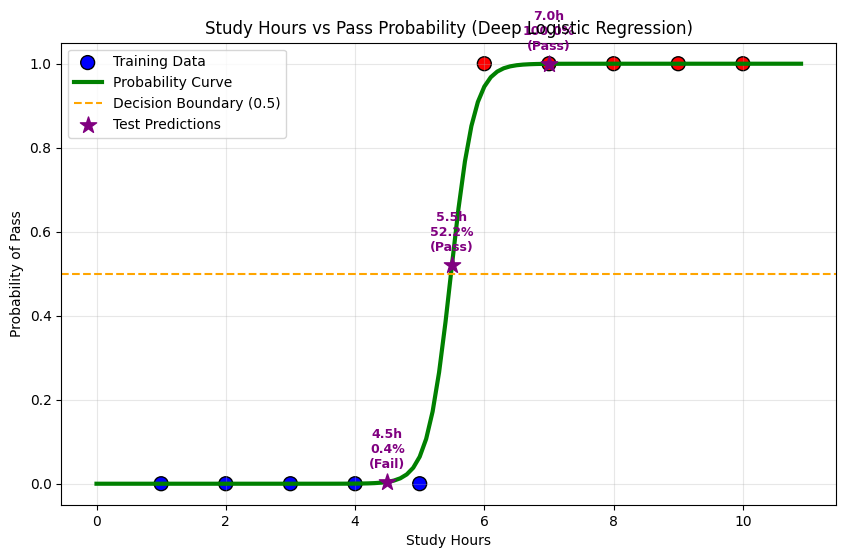

In [28]:
# 시각화를 위한 데이터 생성 (0부터 11까지 촘촘하게)
x_range = torch.arange(0, 11, 0.1).unsqueeze(1).float()

# 모델 예측 (확률값)
with torch.no_grad():
    y_prob = model(x_range)

plt.figure(figsize=(10, 6))

# 1. 실제 데이터 포인트 (산점도)
plt.scatter(x_train, y_train, c=y_train, cmap='bwr', s=100, edgecolors='k', label='Training Data')

# 2. 모델의 예측 확률 곡선 (Sigmoid Curve)
plt.plot(x_range, y_prob, 'g-', linewidth=3, label='Probability Curve')

# 3. 결정 경계 (Decision Boundary, 확률 0.5)
plt.axhline(y=0.5, color='orange', linestyle='--', label='Decision Boundary (0.5)')

# 4. 예측 테스트 결과 시각화
test_hours = torch.FloatTensor([4.5, 5.5, 7.0]).reshape(-1, 1)
with torch.no_grad():
    test_probs = model(test_hours)

plt.scatter(test_hours, test_probs, color='purple', s=150, marker='*', label='Test Predictions', zorder=5)

# 텍스트 주석 추가
for i in range(len(test_hours)):
    h = test_hours[i].item()
    p = test_probs[i].item()
    result = "Pass" if p >= 0.5 else "Fail"
    plt.annotate(f"{h}h\n{p*100:.1f}%\n({result})", (h, p), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=9, fontweight='bold', color='purple')

plt.title('Study Hours vs Pass Probability (Deep Logistic Regression)')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Pass')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()